In [3]:
import pandas as pd
import numpy as np
import utils
import matplotlib.pyplot as plt

In [4]:
# Get datasets
data = pd.read_csv("Original/train.csv", sep=';')

In [5]:
data

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,7/1-2 S,3169.3124,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.423170,NaN,NaN,...,27.674368,NaN,NaN,-0.001763,NaN,NaN,26.673708,NaN,30000,2.0
1170507,7/1-2 S,3169.4644,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.379244,NaN,NaN,...,28.024338,NaN,NaN,-0.007600,NaN,NaN,26.840818,NaN,65030,2.0
1170508,7/1-2 S,3169.6164,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.350248,NaN,NaN,...,28.091282,NaN,NaN,-0.018297,NaN,NaN,27.007942,NaN,65030,2.0
1170509,7/1-2 S,3169.7684,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.313779,NaN,NaN,...,28.019775,NaN,NaN,-0.011438,NaN,NaN,27.175179,NaN,65030,2.0


In [8]:
data.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [9]:
data.isna().sum()

WELL                                       0
DEPTH_MD                                   0
X_LOC                                  10775
Y_LOC                                  10775
Z_LOC                                  10775
GROUP                                   1278
FORMATION                             136994
CALI                                   87877
RSHA                                  539861
RMED                                   38993
RDEP                                   11015
RHOB                                  161269
GR                                         0
SGR                                  1101158
NPHI                                  405102
PEF                                   498819
DTC                                    80863
SP                                    306264
BS                                    487854
ROP                                   635440
DTS                                   995898
DCAL                                  871678
DRHO      

In [10]:
main_numerical = ['CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO']

In [20]:
len(main_numerical)

20

(array([1.6000e+01, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 4.0000e+00, 1.7000e+01, 3.0000e+00, 2.0000e+00,
        2.0000e+00, 2.0000e+00, 4.0000e+00, 2.0000e+00, 2.0000e+00,
        2.0000e+00, 2.0000e+00, 0.0000e+00, 5.1000e+01, 4.8800e+02,
        3.1000e+01, 6.3000e+01, 5.9000e+01, 1.2100e+02, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

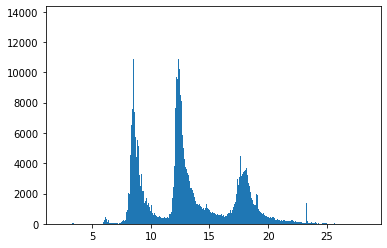

In [55]:
plt.hist(data[main_numerical[0]], bins = 1000)

(array([2.0000e+01, 2.7000e+01, 4.1000e+01, 1.0400e+02, 7.9000e+02,
        6.7500e+02, 1.7400e+03, 1.4770e+03, 1.4970e+03, 1.9120e+03,
        2.1040e+03, 2.3110e+03, 2.5550e+03, 3.5590e+03, 4.6560e+03,
        5.4750e+03, 6.1210e+03, 7.3270e+03, 8.3000e+03, 9.4410e+03,
        9.8310e+03, 9.7350e+03, 1.0564e+04, 1.2212e+04, 1.1890e+04,
        1.2269e+04, 1.2408e+04, 1.2786e+04, 1.2085e+04, 1.1679e+04,
        1.1110e+04, 1.0980e+04, 1.0503e+04, 9.8390e+03, 9.2640e+03,
        8.7750e+03, 8.6470e+03, 7.9770e+03, 7.9140e+03, 7.9800e+03,
        7.9700e+03, 7.3960e+03, 7.1750e+03, 7.0340e+03, 6.5880e+03,
        6.3530e+03, 6.5600e+03, 6.2470e+03, 6.0370e+03, 5.9580e+03,
        5.9850e+03, 5.7280e+03, 5.4000e+03, 5.2610e+03, 5.2340e+03,
        4.8840e+03, 4.6440e+03, 4.0410e+03, 3.8440e+03, 3.6510e+03,
        3.4520e+03, 3.2630e+03, 3.1980e+03, 3.0990e+03, 2.9400e+03,
        2.9220e+03, 2.8150e+03, 2.6090e+03, 2.5920e+03, 2.5310e+03,
        2.4470e+03, 2.4360e+03, 2.4160e+03, 2.36

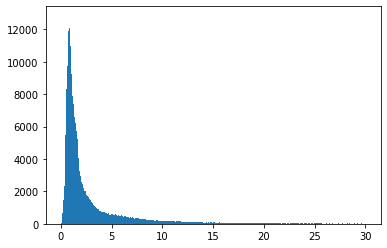

In [54]:
plt.hist(data[main_numerical[1]], range=(0,30), bins = 1000)

(array([0.0000e+00, 2.0000e+01, 3.8000e+01, 2.2000e+01, 2.9300e+02,
        2.8900e+02, 7.2200e+02, 6.2500e+02, 4.2400e+02, 4.5700e+02,
        5.9100e+02, 7.1700e+02, 1.3160e+03, 2.7420e+03, 4.4740e+03,
        6.1420e+03, 8.1490e+03, 1.0429e+04, 1.2180e+04, 1.4201e+04,
        1.6077e+04, 1.8448e+04, 2.0736e+04, 2.2504e+04, 2.3600e+04,
        2.3741e+04, 2.2532e+04, 2.0845e+04, 2.0493e+04, 2.0572e+04,
        1.9891e+04, 1.8255e+04, 1.7764e+04, 1.7625e+04, 1.7075e+04,
        1.7031e+04, 1.7238e+04, 1.6203e+04, 1.5919e+04, 1.6027e+04,
        1.5894e+04, 1.5637e+04, 1.5183e+04, 1.4542e+04, 1.4258e+04,
        1.4508e+04, 1.4167e+04, 1.3585e+04, 1.2982e+04, 1.2142e+04,
        1.1822e+04, 1.1348e+04, 1.0497e+04, 1.0281e+04, 1.0045e+04,
        9.9860e+03, 9.7850e+03, 9.2210e+03, 8.7410e+03, 8.6980e+03,
        8.4810e+03, 7.9780e+03, 8.0590e+03, 7.9260e+03, 7.8430e+03,
        7.8130e+03, 7.2800e+03, 6.6840e+03, 6.4140e+03, 6.2110e+03,
        5.9280e+03, 5.8150e+03, 5.5010e+03, 5.45

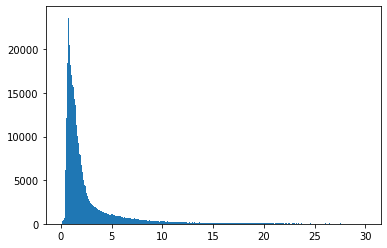

In [53]:
plt.hist(data[main_numerical[2]], range=(0,30), bins = 1000)

(array([0.0000e+00, 4.2000e+01, 2.6000e+01, 1.6000e+01, 1.1600e+02,
        2.9200e+02, 3.6800e+02, 4.1700e+02, 5.1400e+02, 8.7400e+02,
        1.0110e+03, 1.7170e+03, 3.0960e+03, 4.5710e+03, 5.6050e+03,
        7.6430e+03, 1.0621e+04, 1.2532e+04, 1.4702e+04, 1.5652e+04,
        1.6783e+04, 1.7833e+04, 1.9570e+04, 2.0835e+04, 2.2110e+04,
        2.2888e+04, 2.2683e+04, 2.1732e+04, 2.0541e+04, 1.9007e+04,
        1.7616e+04, 1.7037e+04, 1.7296e+04, 1.7156e+04, 1.6649e+04,
        1.6247e+04, 1.6210e+04, 1.6393e+04, 1.5991e+04, 1.6495e+04,
        1.6726e+04, 1.6720e+04, 1.6662e+04, 1.6319e+04, 1.6422e+04,
        1.5825e+04, 1.5505e+04, 1.5163e+04, 1.5031e+04, 1.4157e+04,
        1.3922e+04, 1.3090e+04, 1.2476e+04, 1.1549e+04, 1.1404e+04,
        1.0527e+04, 1.0365e+04, 1.0087e+04, 9.6780e+03, 9.5890e+03,
        9.0970e+03, 8.5700e+03, 8.2420e+03, 7.7180e+03, 7.3160e+03,
        6.9070e+03, 6.4950e+03, 6.3360e+03, 6.0610e+03, 5.7690e+03,
        5.4670e+03, 5.5450e+03, 5.2010e+03, 5.09

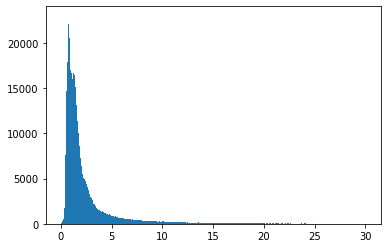

In [52]:
plt.hist(data[main_numerical[3]], range=(0,30), bins = 1000)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

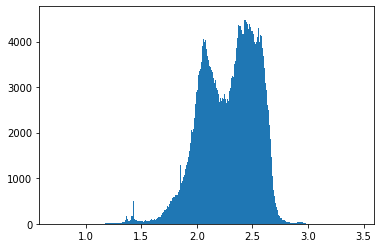

In [51]:
plt.hist(data[main_numerical[4]], bins = 1000)

(array([7.000e+00, 4.000e+00, 1.000e+01, 1.400e+01, 1.400e+01, 1.800e+01,
        4.400e+01, 8.500e+01, 1.670e+02, 2.840e+02, 4.350e+02, 4.390e+02,
        4.140e+02, 4.440e+02, 4.450e+02, 6.000e+02, 6.060e+02, 6.000e+02,
        6.400e+02, 6.570e+02, 7.920e+02, 9.290e+02, 1.118e+03, 1.434e+03,
        1.525e+03, 1.658e+03, 1.594e+03, 1.509e+03, 1.473e+03, 1.377e+03,
        1.192e+03, 1.089e+03, 1.017e+03, 1.020e+03, 8.840e+02, 1.047e+03,
        1.005e+03, 9.500e+02, 1.025e+03, 1.145e+03, 1.053e+03, 1.040e+03,
        1.151e+03, 1.122e+03, 1.094e+03, 1.132e+03, 1.189e+03, 1.225e+03,
        1.397e+03, 1.474e+03, 1.551e+03, 1.611e+03, 1.653e+03, 1.721e+03,
        1.808e+03, 1.872e+03, 1.924e+03, 1.842e+03, 2.133e+03, 2.118e+03,
        2.160e+03, 2.154e+03, 2.099e+03, 2.409e+03, 2.357e+03, 2.425e+03,
        2.446e+03, 2.460e+03, 2.455e+03, 2.691e+03, 2.615e+03, 2.775e+03,
        2.814e+03, 2.889e+03, 2.915e+03, 3.009e+03, 3.012e+03, 3.248e+03,
        3.136e+03, 3.221e+03, 3.366e+0

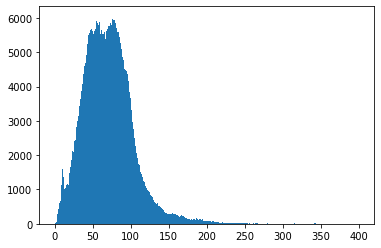

In [56]:
plt.hist(data[main_numerical[5]], range=(0,400), bins = 1000)

(array([8.716e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        3.000e+00, 4.000e+00, 7.000e+00, 1.100e+01, 1.500e+01, 1.100e+01,
        1.400e+01, 2.300e+01, 1.900e+01, 2.600e+01, 2.300e+01, 1.500e+01,
        2.100e+01, 2.200e+01, 2.100e+0

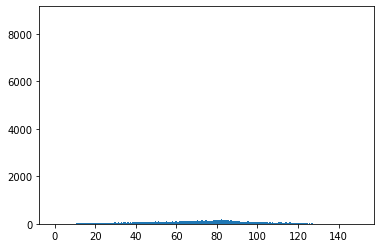

In [59]:
plt.hist(data[main_numerical[6]], range=(0,150), bins = 1000)

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 3.000e+00,
        2.200e+01, 6.000e+01, 1.120e+0

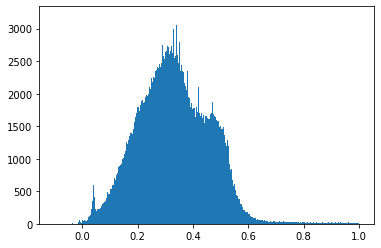

In [60]:
plt.hist(data[main_numerical[7]], range=(-0.1,1), bins = 1000)

(array([0.000e+00, 0.000e+00, 7.100e+01, 7.000e+00, 2.000e+00, 7.000e+00,
        8.000e+00, 1.000e+01, 9.000e+00, 6.000e+00, 6.000e+00, 1.000e+01,
        1.800e+01, 2.400e+01, 2.600e+01, 3.800e+01, 2.900e+01, 4.000e+01,
        4.200e+01, 5.900e+01, 7.400e+01, 7.700e+01, 1.160e+02, 7.550e+02,
        1.170e+02, 1.410e+02, 8.690e+02, 2.050e+02, 1.410e+02, 1.320e+02,
        1.230e+02, 1.460e+02, 1.450e+02, 2.020e+02, 2.700e+02, 4.000e+02,
        5.810e+02, 6.220e+02, 5.960e+02, 7.110e+02, 7.830e+02, 8.150e+02,
        8.180e+02, 6.910e+02, 5.660e+02, 4.930e+02, 5.630e+02, 5.920e+02,
        7.660e+02, 8.420e+02, 9.300e+02, 1.161e+03, 1.230e+03, 1.421e+03,
        1.870e+03, 2.261e+03, 2.826e+03, 3.135e+03, 3.580e+03, 3.611e+03,
        3.603e+03, 3.511e+03, 3.839e+03, 3.788e+03, 4.167e+03, 4.335e+03,
        4.251e+03, 4.036e+03, 4.076e+03, 4.139e+03, 4.274e+03, 4.370e+03,
        4.567e+03, 4.868e+03, 4.963e+03, 5.394e+03, 5.676e+03, 5.894e+03,
        6.221e+03, 6.406e+03, 6.824e+0

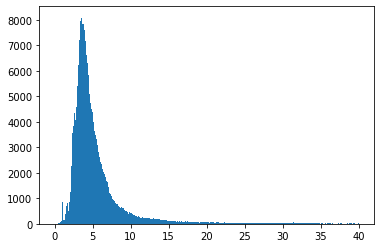

In [62]:
plt.hist(data[main_numerical[8]], range=(0,40), bins = 1000)

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 4.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 3.000e+00, 4.000e+00, 3.000e+00, 3.000e+00,
        1.000e+00, 2.000e+00, 1.000e+0

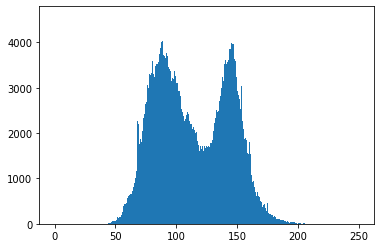

In [63]:
plt.hist(data[main_numerical[9]], range=(0,250), bins = 1000)

(array([8.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 5.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00,
        2.0000e+00, 7.0000e+00, 9.0000e+00, 8.0000e+00, 9.0000e+00,
        5.0000e+00, 7.0000e+00, 8.0000e+00, 9.0000e+00, 7.0000e+00,
        2.0000e+00, 1.1000e+01, 4.0000e+00, 0.0000e+00, 2.0000e+00,
        1.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00, 4.0000e+00,
        1.0000e+00, 8.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 4.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00,
        1.0000e+00, 6.0000e+00, 6.0000e+00, 1.00

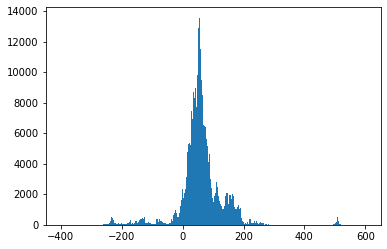

In [66]:
plt.hist(data[main_numerical[10]], range=(-400,600), bins = 1000)

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        3.76000e+03, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.09500e+03,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

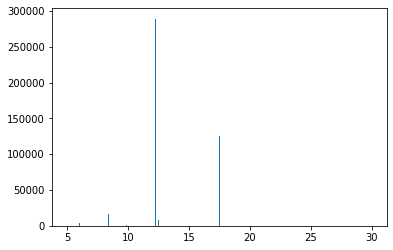

In [67]:
plt.hist(data[main_numerical[11]], range=(5,30), bins = 1000)

(array([8.150e+02, 4.024e+03, 5.643e+03, 5.034e+03, 5.065e+03, 4.511e+03,
        5.126e+03, 6.333e+03, 4.404e+03, 7.513e+03, 6.045e+03, 5.290e+03,
        5.665e+03, 4.915e+03, 5.915e+03, 5.505e+03, 5.231e+03, 5.166e+03,
        4.300e+03, 4.914e+03, 4.513e+03, 3.944e+03, 4.052e+03, 3.648e+03,
        4.230e+03, 3.634e+03, 4.187e+03, 3.615e+03, 3.184e+03, 3.067e+03,
        2.999e+03, 2.533e+03, 2.914e+03, 2.606e+03, 2.991e+03, 2.760e+03,
        2.918e+03, 2.472e+03, 2.387e+03, 2.674e+03, 2.614e+03, 2.669e+03,
        2.360e+03, 2.022e+03, 2.500e+03, 2.631e+03, 2.169e+03, 1.954e+03,
        2.150e+03, 2.624e+03, 2.158e+03, 1.923e+03, 1.866e+03, 1.962e+03,
        2.204e+03, 2.082e+03, 2.167e+03, 2.288e+03, 1.957e+03, 2.201e+03,
        2.320e+03, 2.525e+03, 2.322e+03, 1.952e+03, 2.316e+03, 2.102e+03,
        1.970e+03, 1.878e+03, 1.880e+03, 2.070e+03, 2.109e+03, 1.917e+03,
        1.765e+03, 1.665e+03, 2.004e+03, 1.984e+03, 1.829e+03, 1.749e+03,
        1.791e+03, 1.720e+03, 1.851e+0

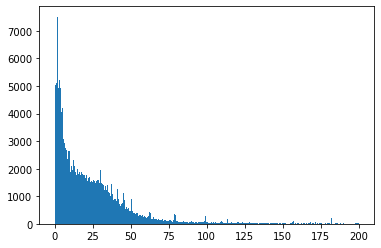

In [72]:
plt.hist(data[main_numerical[12]], range=(0,200), bins = 1000)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 3.000e+00,
        6.000e+00, 4.000e+00, 1.100e+01, 1.100e+01, 8.000e+00, 4.000e+00,
        1.600e+01, 1.100e+01, 1.100e+01, 1.600e+01, 1.800e+01, 1.900e+01,
        2.200e+01, 2.400e+01, 2.000e+01, 2.200e+01, 2.200e+01, 2.900e+01,
        2.500e+01, 3.700e+01, 2.600e+01, 2.700e+01, 3.100e+01, 2.900e+01,
        2.100e+01, 2.500e+01, 2.900e+01, 3.300e+01, 3.000e+01, 4.000e+01,
        5.200e+01, 5.400e+01, 5.300e+01, 3.500e+01, 4.200e+01, 8.600e+01,
        6.300e+01, 7.200e+01, 6.600e+01, 7.600e+01, 8.200e+01, 7.500e+01,
        8.200e+01, 9.500e+01, 1.230e+02, 1.300e+02, 1.420e+02, 1.520e+02,
        1.770e+02, 1.650e+02, 2.170e+0

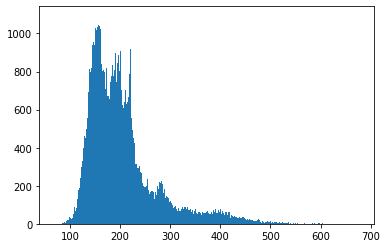

In [69]:
plt.hist(data[main_numerical[13]], bins = 1000)

(array([2.660e+03, 2.622e+03, 3.736e+03, 4.027e+03, 3.007e+03, 2.661e+03,
        2.910e+03, 4.282e+03, 4.320e+03, 3.499e+03, 3.321e+03, 3.014e+03,
        4.280e+03, 3.949e+03, 4.344e+03, 3.242e+03, 3.887e+03, 3.946e+03,
        3.231e+03, 3.773e+03, 3.303e+03, 4.194e+03, 4.305e+03, 3.095e+03,
        3.092e+03, 2.792e+03, 3.064e+03, 3.605e+03, 3.336e+03, 3.218e+03,
        2.678e+03, 2.971e+03, 3.230e+03, 2.817e+03, 3.378e+03, 2.582e+03,
        2.725e+03, 2.282e+03, 2.328e+03, 2.411e+03, 2.210e+03, 2.872e+03,
        1.997e+03, 1.799e+03, 1.905e+03, 2.031e+03, 1.700e+03, 1.765e+03,
        1.812e+03, 1.634e+03, 2.023e+03, 1.435e+03, 1.447e+03, 1.452e+03,
        1.413e+03, 1.718e+03, 1.337e+03, 1.622e+03, 1.252e+03, 1.121e+03,
        1.155e+03, 1.261e+03, 1.034e+03, 1.092e+03, 1.295e+03, 1.061e+03,
        9.140e+02, 1.056e+03, 1.100e+03, 1.106e+03, 1.069e+03, 1.223e+03,
        9.280e+02, 9.570e+02, 1.895e+03, 9.190e+02, 8.630e+02, 1.203e+03,
        8.800e+02, 7.570e+02, 7.300e+0

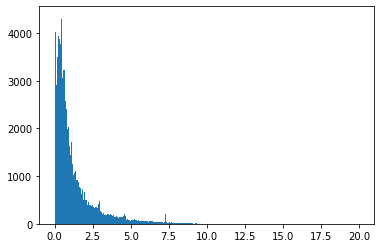

In [71]:
plt.hist(data[main_numerical[14]], range=(0,20), bins = 1000)

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 9.87856e+05]),
 array([-7.42933887e+03, -6.68612129e+03, -5.94290371e+03, -5.19968613e+03,
        -4.45646854e+03, -3.71325096e+03, -2.97003338e+03, -2.22681580e+03,
        -1.48359822e+03, -7.40380642e+02,  2.83693838e+00]),
 <BarContainer object of 10 artists>)

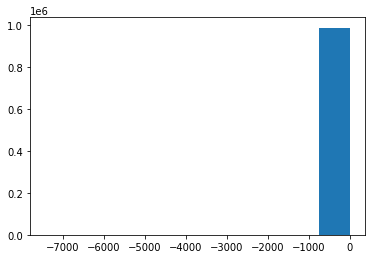

In [76]:
plt.hist(data[main_numerical[15]])

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

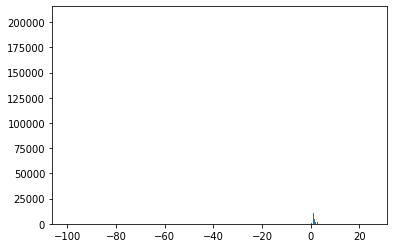

In [77]:
plt.hist(data[main_numerical[16]], range=(-100,25), bins = 1000)

(array([1.75974e+05, 1.70000e+02, 2.00000e+00, 3.00000e+00, 2.00000e+00,
        1.00000e+00, 3.00000e+00, 0.00000e+00, 0.00000e+00, 5.00000e+00]),
 array([5.65855578e-02, 1.00005093e+03, 2.00004527e+03, 3.00003961e+03,
        4.00003395e+03, 5.00002829e+03, 6.00002263e+03, 7.00001698e+03,
        8.00001132e+03, 9.00000566e+03, 1.00000000e+04]),
 <BarContainer object of 10 artists>)

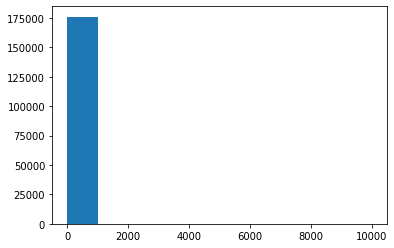

In [32]:
plt.hist(data[main_numerical[17]])

(array([2.70000e+01, 3.00000e+00, 4.00000e+00, 4.00000e+00, 2.00000e+00,
        1.75179e+05, 1.70790e+04, 1.60000e+01, 7.00000e+00, 4.00000e+00]),
 array([-999.2501221 , -825.04532473, -650.84052737, -476.63573   ,
        -302.43093264, -128.22613527,   45.9786621 ,  220.18345946,
         394.38825683,  568.59305419,  742.79785156]),
 <BarContainer object of 10 artists>)

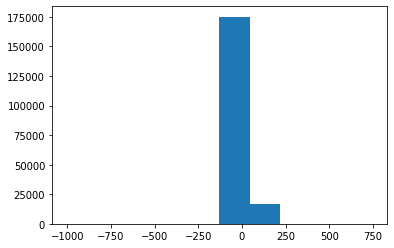

In [33]:
plt.hist(data[main_numerical[18]])

(array([3.2741e+05, 4.0000e+00, 5.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([ -999.9000244 ,  2693.15716554,  6386.21435548, 10079.27154542,
        13772.32873536, 17465.3859253 , 21158.44311524, 24851.50030518,
        28544.55749512, 32237.61468506, 35930.671875  ]),
 <BarContainer object of 10 artists>)

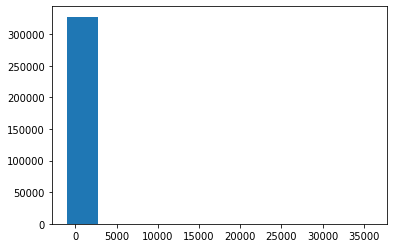

In [34]:
plt.hist(data[main_numerical[19]])